# Cardiovascular risks

In [1]:
## Importation des librairies nécessaires au bon déroulement du projet.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Regressions logistiques + Visualisation de la courbe ROC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Sommaire :
    1. Analyse Exploratoire du jeu de données
    2. Visualisation du jeu de données
    3. Réalisation de regression logistique 
        - Sklearn
        - Mon modèle
    4. Évaluation des modèles de régression logistique
    5. Prédiction pour le patient Arthur

## 1. Analyse Exploratoire du jeu de données.
    - Importation du jeu de données
    - Visualisation des données / Informations sur les données
    - Pré-traitement et nettoyage des données

In [2]:
# Importation du dataframe
df = pd.read_csv('csv/cardio_train.csv', delimiter=";")

In [3]:
# Conversion de l'âge en années et arrondissement à l'entier le plus proche
df['age'] = df['age'] / 365
df['age'] = df['age'].apply(lambda x: round(x))

In [4]:
# # mapping de la variable cible
# df['cardio'] = df['cardio'].map({0: 'No', 1: 'Yes'})

In [5]:
# Visualisation des données
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# Informations générale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Aucune valeur manquante.
La totalité de nos données est numérique, vous trouverez un descriptif détaillé du type de nos données dans le ReadMe.

### Suppression des colonnes inutiles ansi que des doublons.

In [7]:
# Suppression des colonnes inutiles
df = df.drop(columns=['id'])

In [8]:
# Affichage et suppression des valeurs dupliquées
print(f'Total des valeurs dupliquées : {df.duplicated().sum()}')
df = df.drop_duplicates().reset_index(drop=True)

Total des valeurs dupliquées : 3816


In [9]:
# Afficher le pourcentage de valeurs aberrantes supprimées
print(f"Pourcentage de valeurs supprimées à ce stade: {(70000 - df.shape[0]) / 70000 * 100:.2f}%")

Pourcentage de valeurs supprimées à ce stade: 5.45%


### Statistiques descriptives (moyenne, médiane, écart-type, etc.)

In [10]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000
mean,53.365209,1.357231,164.345114,74.579057,129.304938,97.607186,1.385985,1.238169,0.092772,0.056751,0.797625,0.513614
std,6.807710,0.479187,8.353877,14.613279,158.368179,193.782532,0.692229,0.584137,0.290114,0.231368,0.401773,0.499818
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**À cette étape, on remarque déjà que notre dataset contient des valeurs aberrantes ; notamment les valeurs min/max des variables ap_hi et ap_lo).   
Voyons de plus près la distibution de ces dernières au sein de notre jeu de données :**

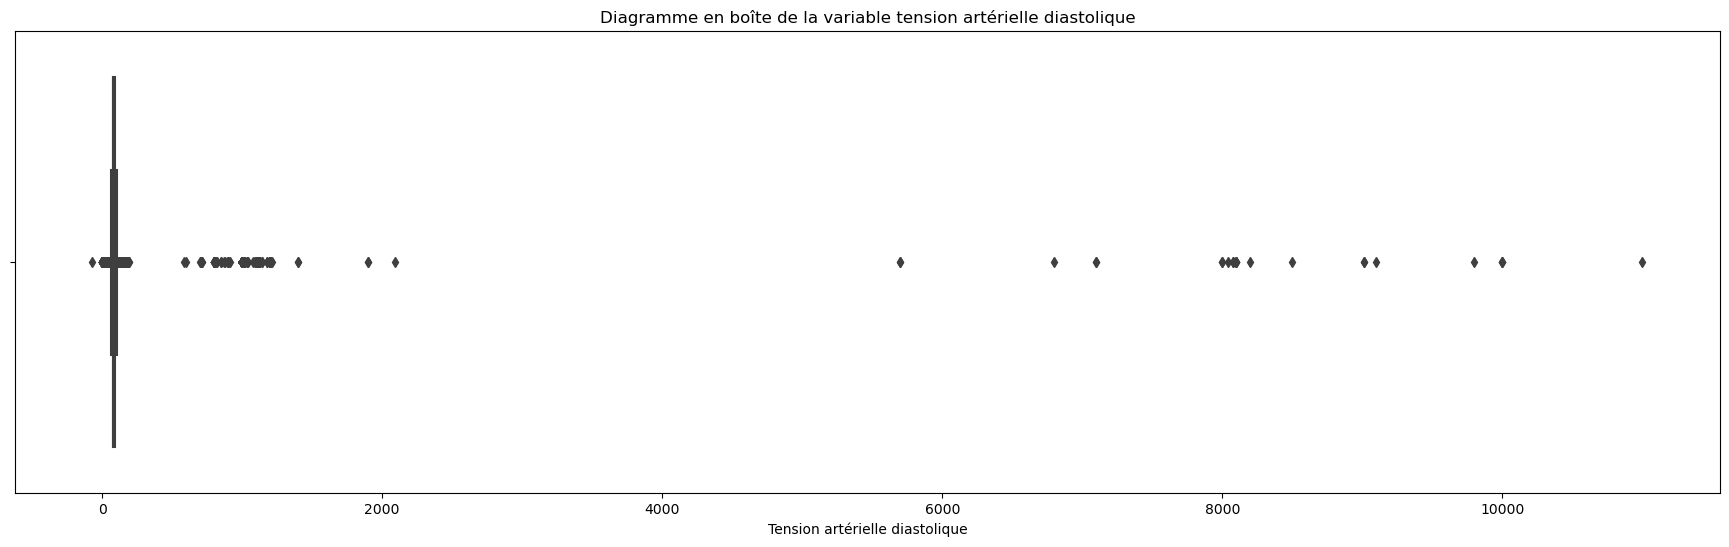

In [11]:
# diagramme en boite de la variable tension artérielle diastolique
plt.figure(figsize=(22, 6))
sns.boxplot(x='ap_lo', data=df)
plt.title('Diagramme en boîte de la variable tension artérielle diastolique')
plt.xlabel('Tension artérielle diastolique')
plt.show()

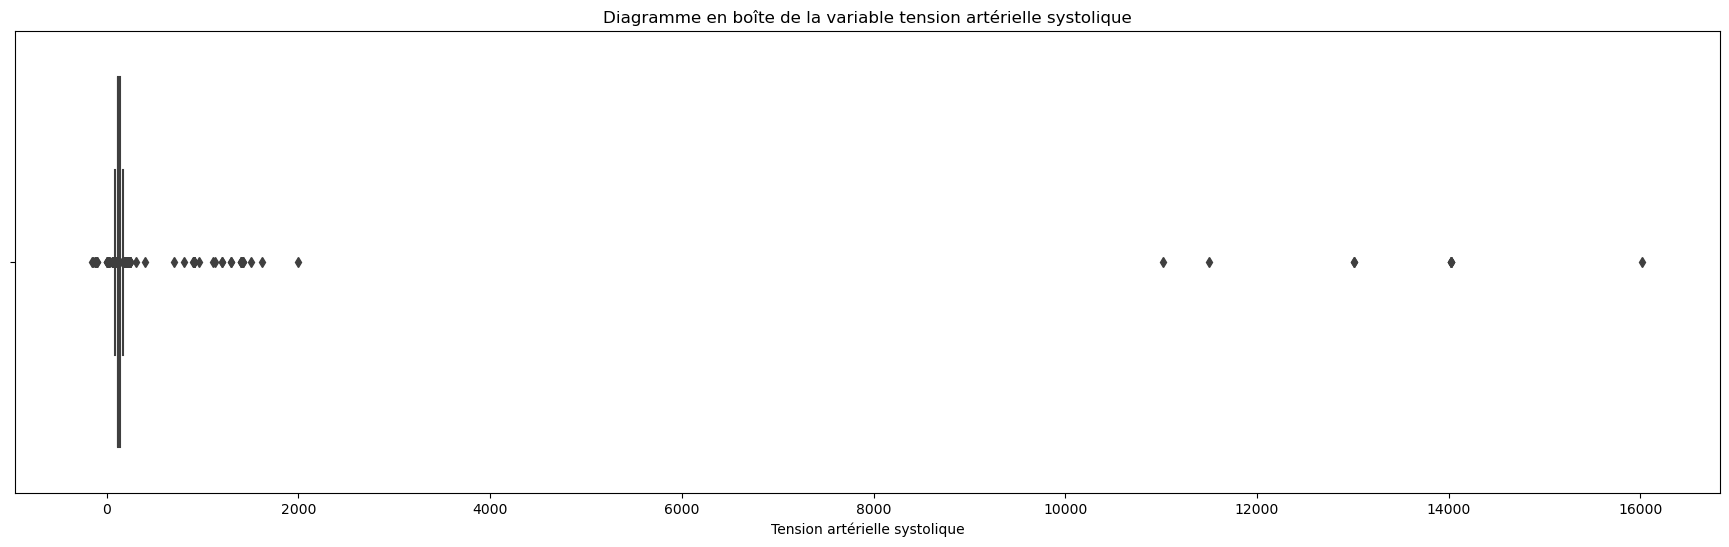

In [12]:
# diagramme en boite de la variable tension artérielle diastolique
plt.figure(figsize=(22, 6))
sns.boxplot(x='ap_hi', data=df)
plt.title('Diagramme en boîte de la variable tension artérielle systolique')
plt.xlabel('Tension artérielle systolique')
plt.show()

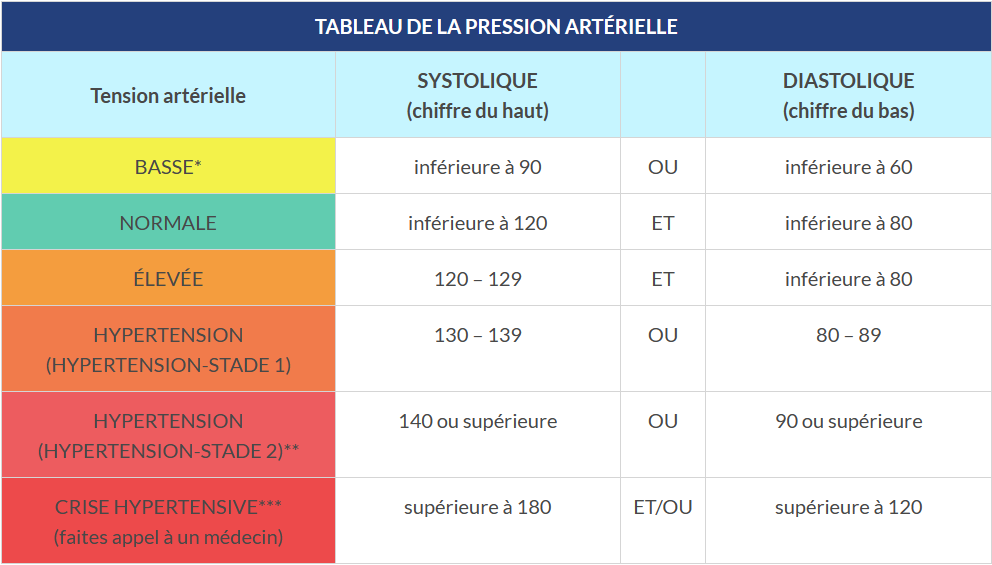

À l'aide du tableau ci-dessus, je décide de me débarasser des données qui ne correspondent pas à l'intervalle décrit.

In [13]:
# Suppression des valeurs aberrantes
df = df[(df['ap_hi'] > 90) & (df['ap_hi'] < 180)].reset_index(drop=True)
df = df[(df['ap_lo'] > 60) & (df['ap_lo'] < 120)].reset_index(drop=True)

df = df[(df['height'] > 140) & (df['height'] < 200)].reset_index(drop=True)
df = df[(df['weight'] > 50) & (df['weight'] < 200)].reset_index(drop=True)

In [14]:
# Afficher le pourcentage de valeurs aberrantes supprimées
print(f"Pourcentage total de valeurs supprimées: {(70000 - df.shape[0]) / 70000 * 100:.2f}%")

Pourcentage total de valeurs supprimées: 14.91%


### Ajout de variables 
    - L'indice de masse corporelle (IMC) / (bmi en anglais)
    - La pression artérielle moyenne (P.A.M)

#### Calcul de l'IMC 
**$$ IMC = \frac{poids(kg)}{taille(m^2)}$$**

In [15]:
# Ajout de la variable IMC
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

#### Calcul de la pression artérielle moyenne (P.A.M.)
Formule de Lian :
**$$P.A.M. = \frac{P.A.S.+2 \times P.A.D.}{3}$$**

P.A.S. : préssion artérielle systolique   
P.A.D. : préssion artérielle diastolique

In [16]:
# Ajout de la variable tension artérielle moyenne
df['mean_bp'] = (df['ap_hi'] + 2 * df['ap_lo']) / 3

### Statistiques descriptives après nettoyage du jeu de données.

In [17]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,mean_bp
count,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000
mean,53.461165,1.365883,164.754953,75.289293,127.420047,82.149144,1.389036,1.240715,0.093721,0.057304,0.796592,0.519862,27.791317,97.239445
std,6.770578,0.481681,7.814395,13.943013,14.723068,8.101546,0.696522,0.587939,0.291442,0.232424,0.402537,0.499610,5.141033,9.523320
min,30.000000,1.000000,141.000000,51.000000,93.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.577259,72.333333
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.092971,93.333333
50%,54.000000,1.000000,165.000000,73.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.753213,93.333333
75%,59.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.486657,103.333333
max,65.000000,2.000000,198.000000,183.000000,179.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,68.308315,137.666667


In [18]:
# # mapping de la variable bmi
# df['bmi'] = df['bmi'].apply(lambda x: 'Underweight' if x < 18.5 else ('Normal' if 18.5 <= x < 25 else ('Overweight' if 25 <= x < 30 else 'Obese')))
# df['bmi'] = df['bmi'].astype('object')

# # mapping de la variable tension artérielle
# df['pulse_pressure'] = df['pulse_pressure'].apply(lambda x: 'Normal' if 30 <= x < 60 else ('High' if 60 <= x < 100 else 'Hypertensive crisis'))
# df['pulse_pressure'] = df['pulse_pressure'].astype('object')

## 2. Visualisation et Analyse des données.
    - Distribution des données du dataset
    - Carte (de chaleur) des corrélations
    

#### Distribution des données du dataset.

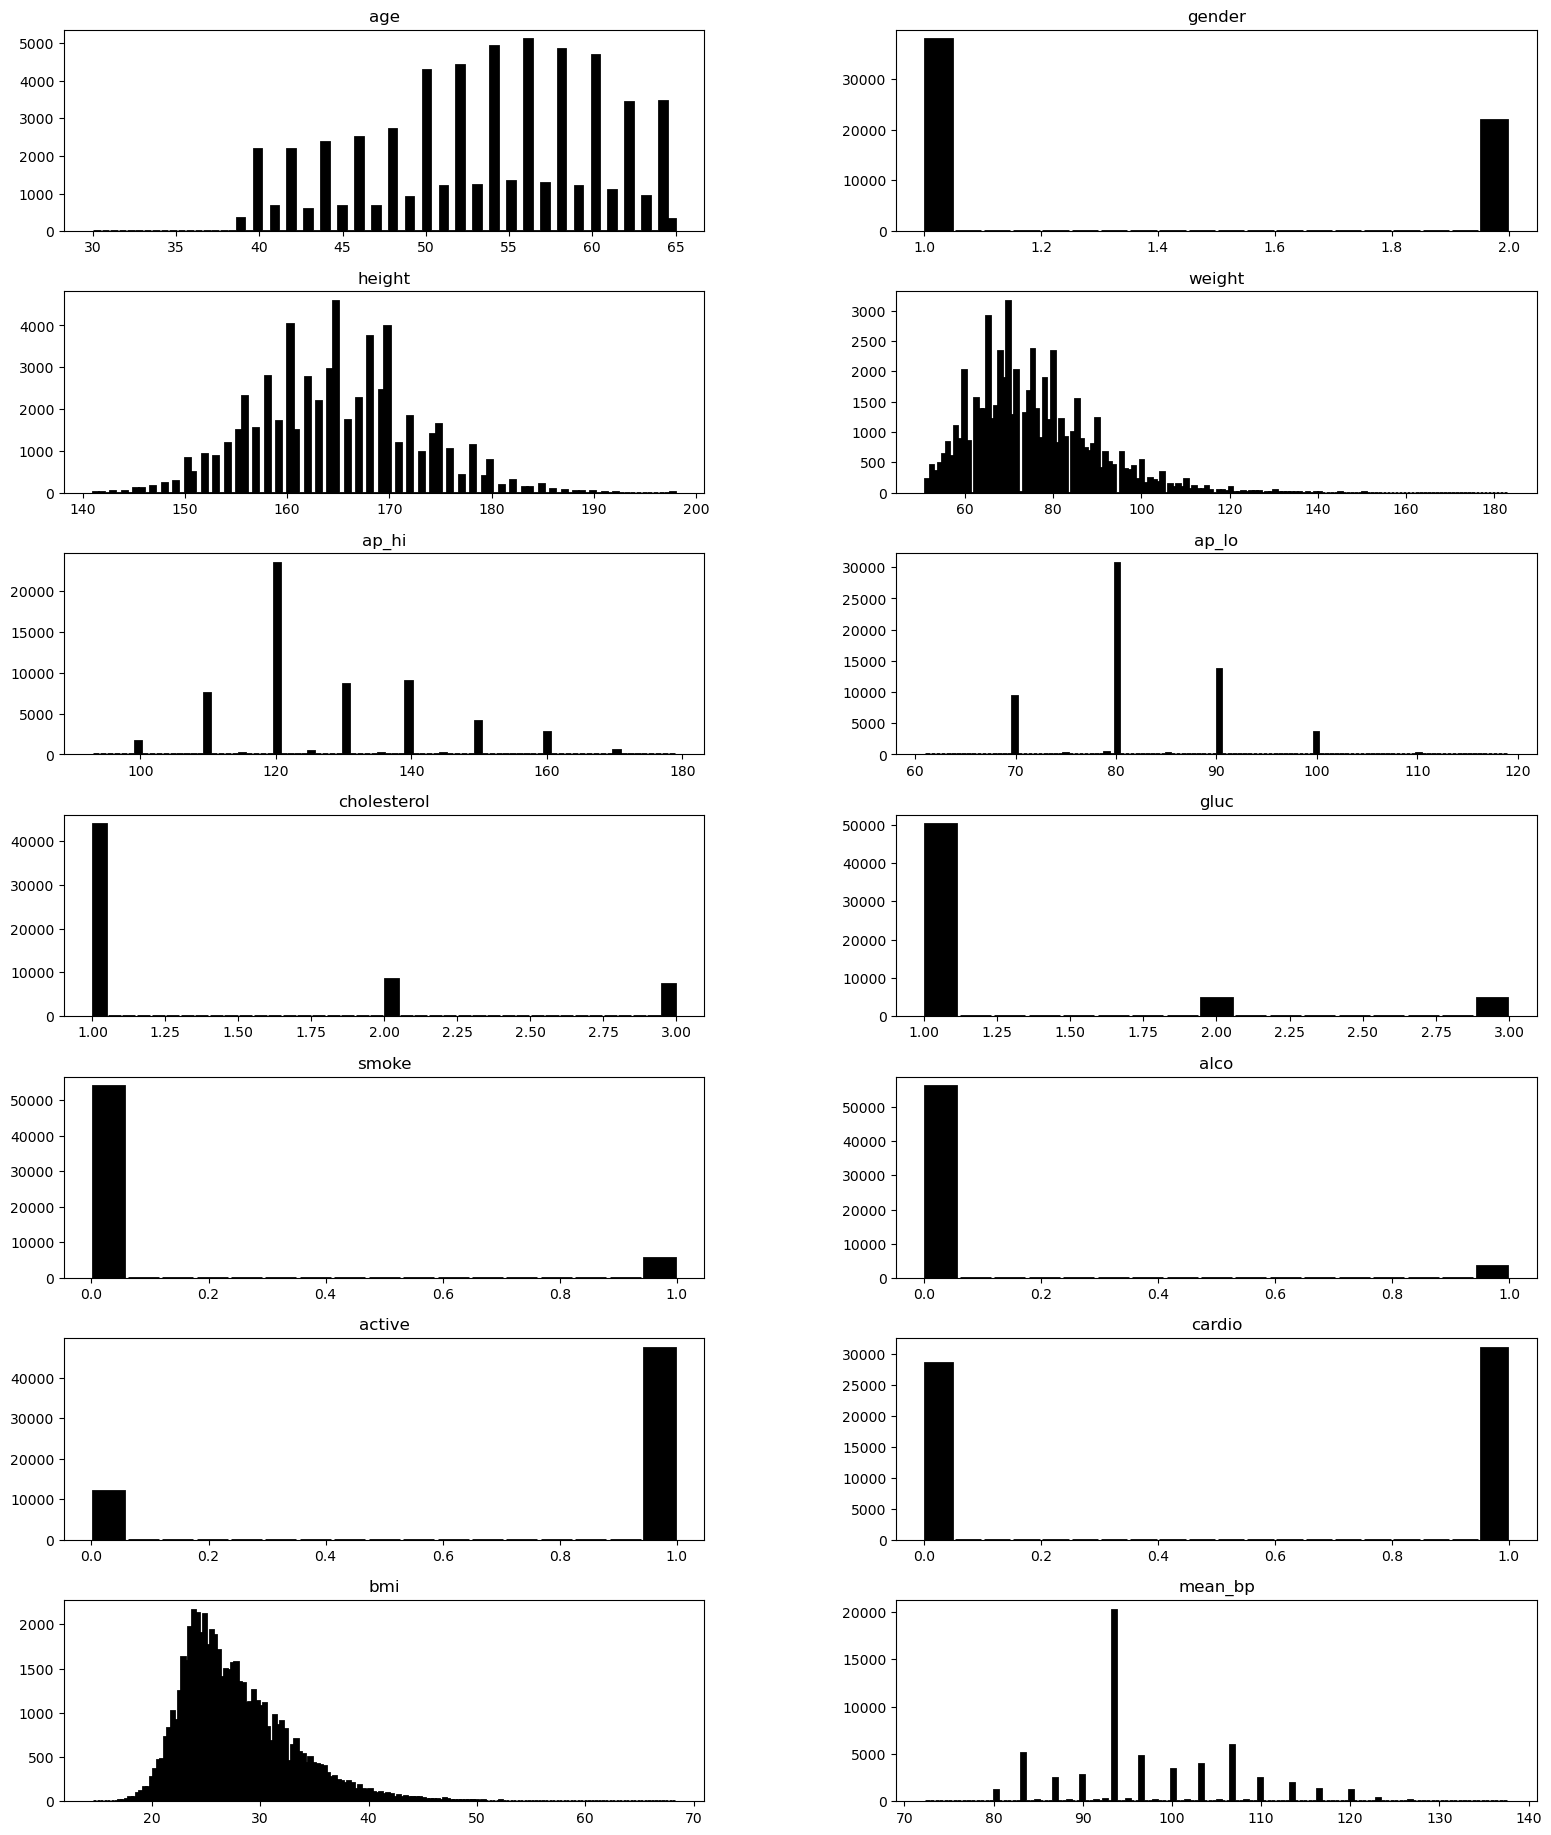

In [19]:
df.hist(figsize=(19, 40), color='black', bins='auto', grid=False, layout=(12, 2), edgecolor='black', linewidth=2, zorder=2, rwidth=0.9, histtype='bar', align='mid', orientation='vertical')
# plt.yscale('log')
plt.show()

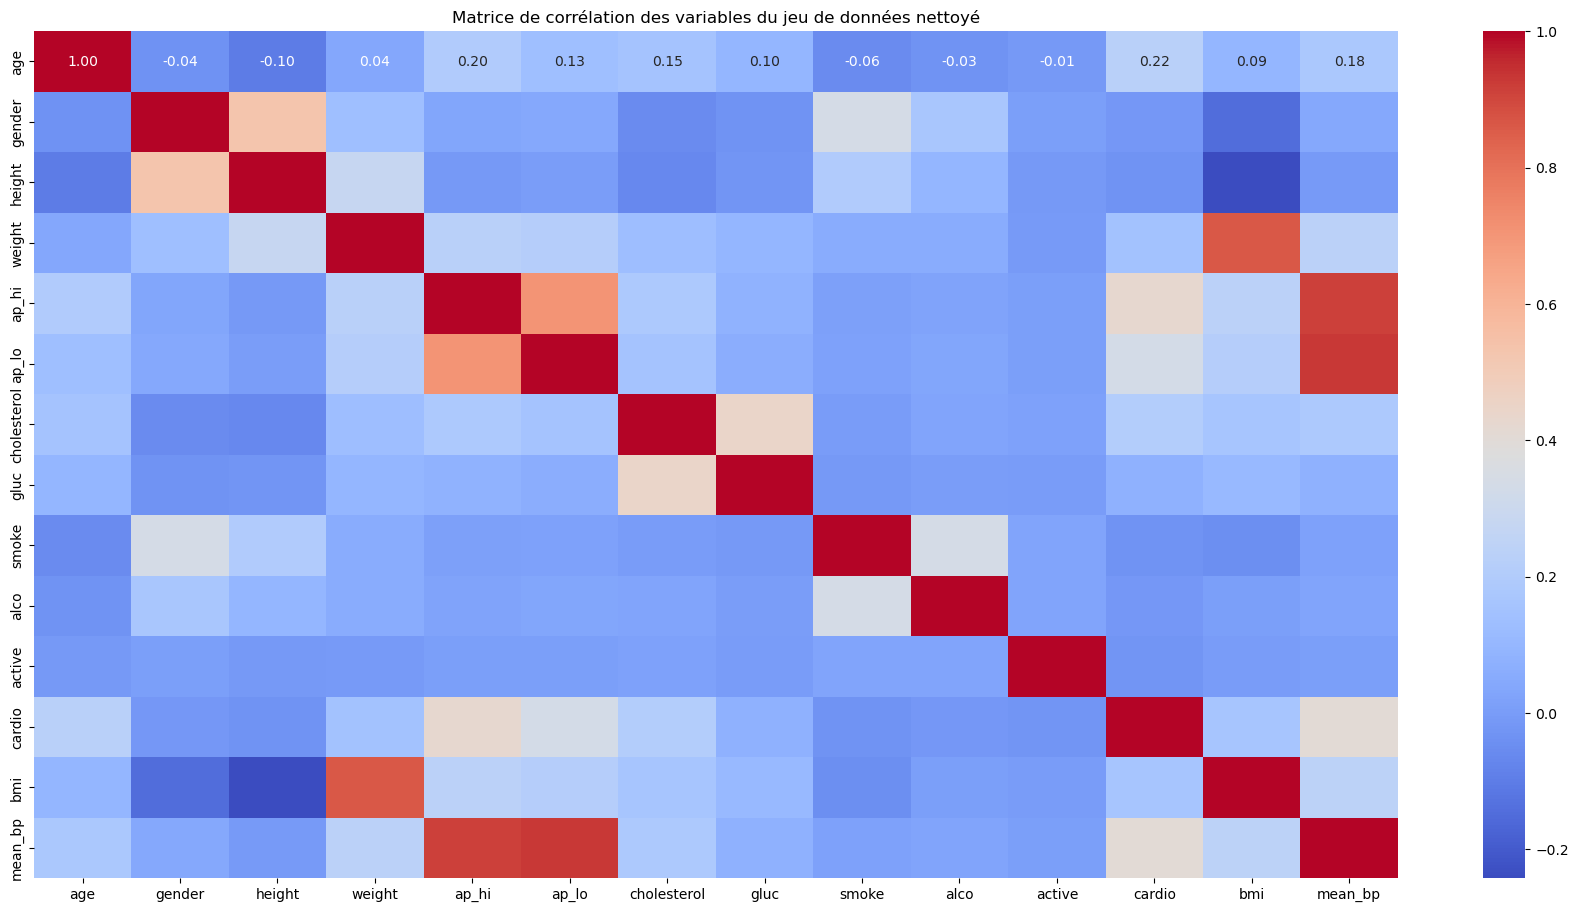

In [20]:
# heatmap de la matrice de corrélation
plt.figure(figsize=(22, 11))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des variables du jeu de données nettoyé')
plt.show()

In [21]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,mean_bp
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,90.000000
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,106.666667
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,90.000000
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,116.666667
4,60,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,93.333333


In [22]:
# mypalette = {
#     'Non': 'tab:blue',
#     2: 'tab:blue',
#     1: 'tab:pink',
#     'Oui': 'tab:red',
#     'Normal': 'tab:green', 
#     'High': 'tab:orange',
#     'Hypertensive crisis': 'tab:red'
# }
# Mes palettes de couleurs
gender = {
    1: 'tab:pink',
    2: 'tab:blue'
}
carisk = {
    0: 'tab:green',
    1: 'tab:red'
}
artmean = {
    'Normal': 'tab:green', 
    'High': 'tab:orange',
    'Hypertensive crisis': 'tab:red'
}

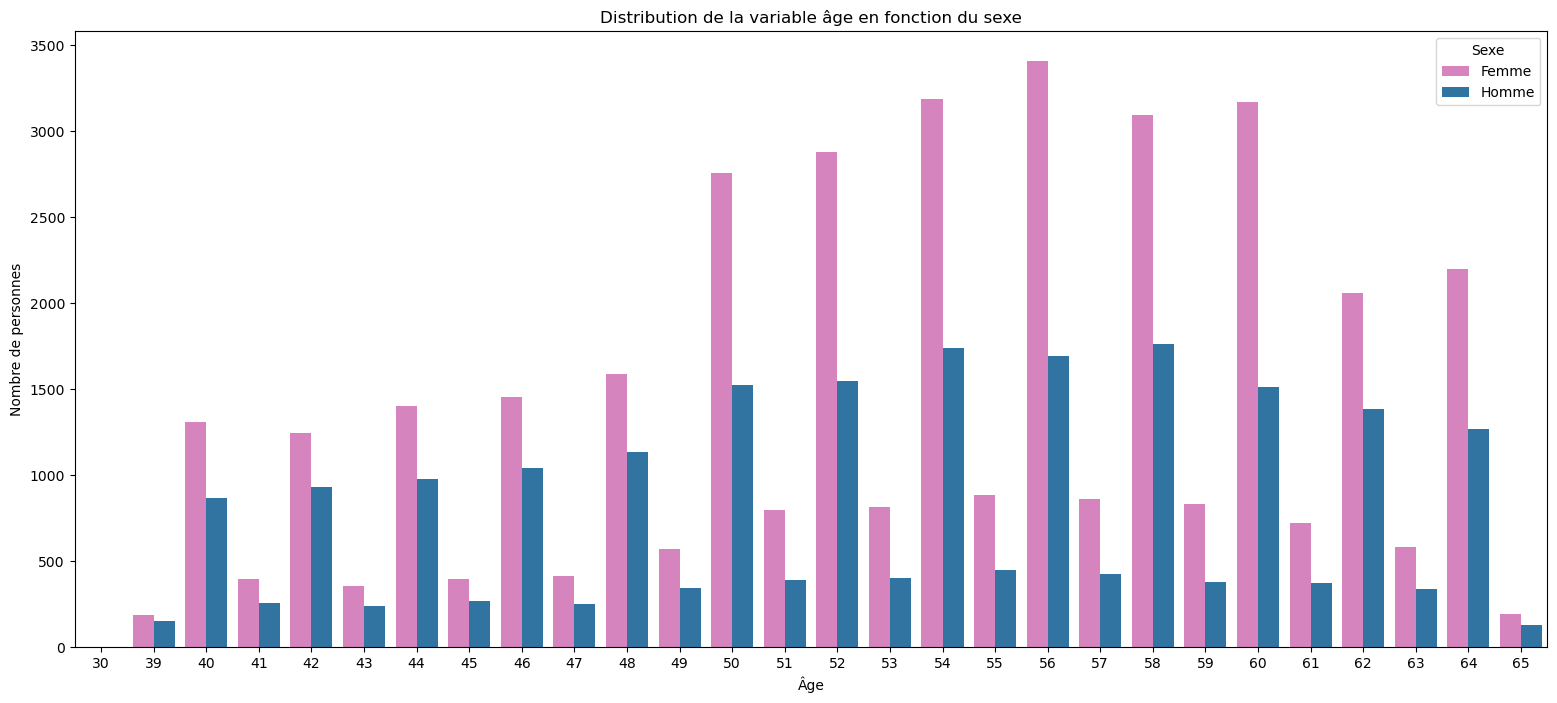

In [23]:
# visualisation de la distribution de la variable âge en fonction du sexe
plt.figure(figsize=(19, 8))
sns.countplot(x='age', hue='gender', data=df, palette=gender)
plt.title('Distribution de la variable âge en fonction du sexe')
plt.legend(labels=['Femme', 'Homme'], title='Sexe')
plt.xlabel('Âge')
plt.ylabel('Nombre de personnes')
plt.show()

On observe que notre jeu de données est majoritairement plus représenté par des patients féminins que des patients masculins et ceci, quelque soit l'âge du patient.

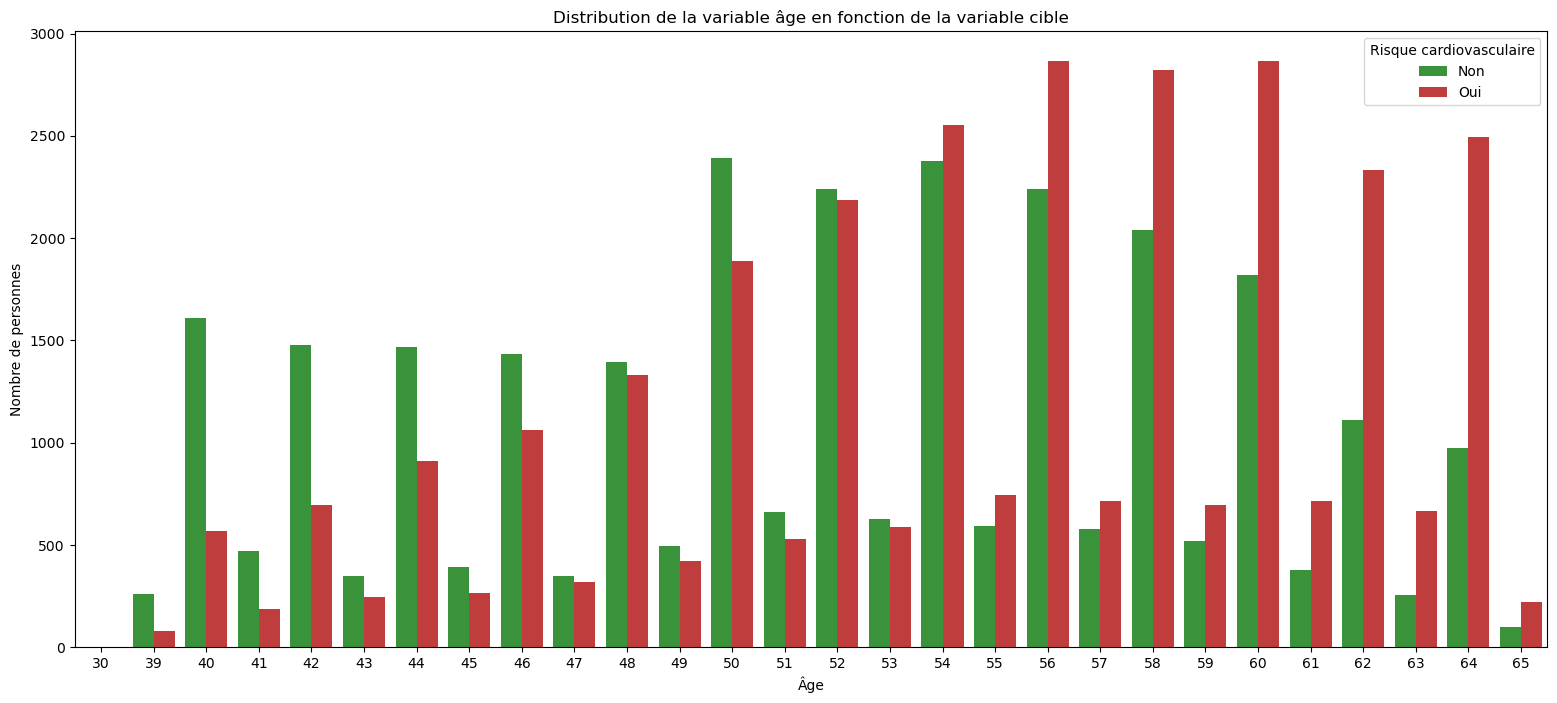

In [24]:
# visualisation de la distribution de la variable âge en fonction de la variable cible
plt.figure(figsize=(19, 8))
sns.countplot(x='age', hue='cardio', data=df, palette=carisk)
plt.title('Distribution de la variable âge en fonction de la variable cible')
plt.legend(loc='upper right', labels=['Non', 'Oui'], title='Risque cardiovasculaire')
plt.xlabel('Âge')
plt.ylabel('Nombre de personnes')
plt.show()

On observe que plus l'âge du patient augmente, plus ce dernier est sujet à des risques de maladies cardio-vasculaires.

In [25]:
# mapping de la variable tension artérielle moyenne
df['mean_bp'] = df['mean_bp'].apply(lambda x: 'Normal' if 60 <= x < 90 else ('High' if 90 <= x < 120 else 'Hypertensive crisis'))
df['mean_bp'] = df['mean_bp'].astype('object')

In [26]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000
mean,53.461165,1.365883,164.754953,75.289293,127.420047,82.149144,1.389036,1.240715,0.093721,0.057304,0.796592,0.519862,27.791317
std,6.770578,0.481681,7.814395,13.943013,14.723068,8.101546,0.696522,0.587939,0.291442,0.232424,0.402537,0.499610,5.141033
min,30.000000,1.000000,141.000000,51.000000,93.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.577259
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.092971
50%,54.000000,1.000000,165.000000,73.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.753213
75%,59.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.486657
max,65.000000,2.000000,198.000000,183.000000,179.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,68.308315


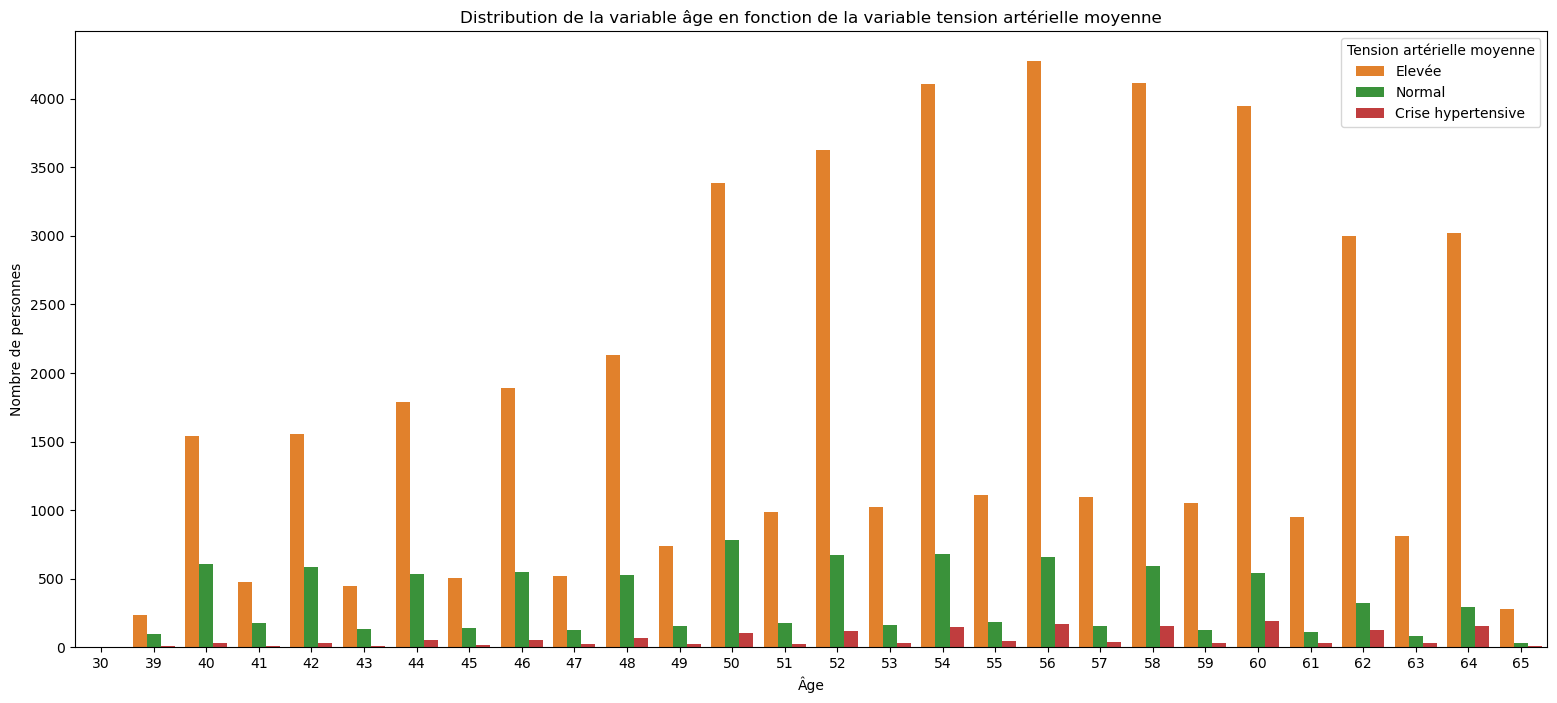

In [27]:
# visualisation de la distribution de la variable age en fonction de la variable tension artérielle moyenne
plt.figure(figsize=(19, 8))
sns.countplot(x='age', hue='mean_bp', data=df, palette=artmean)
plt.title('Distribution de la variable âge en fonction de la variable tension artérielle moyenne')
# plt.legend(loc='upper right', title='Tension artérielle moyenne')
plt.legend(loc='upper right', labels=['Elevée', 'Normal', 'Crise hypertensive'], title='Tension artérielle moyenne')
plt.xlabel('Âge')
plt.ylabel('Nombre de personnes')
plt.show()

On observe ici que la tension artérielle moyenne d'un patient est corrélée à son âge.   
Plus l'âge augmente et plus nombreux seront les patients ayant une tension artérielle, il en est de même pour les cas d'hyper tension artérielle.

In [28]:
# mapping de la variable indice de masse corporelle
df['bmi'] = df['bmi'].apply(lambda x: 'Underweight' if x < 18.5 else ('Normal' if 18.5 <= x < 25 else ('Overweight' if 25 <= x < 30 else 'Obese')))
df['bmi'] = df['bmi'].astype('object')

In [29]:
df['bmi'] = df['bmi'].apply(lambda x: 'Sous-poids' if x == 'Underweight' else ('Normal' if x == 'Normal' else ('Surpoids' if x == 'Overweight' else 'Obèse')))
df['bmi'] = df['bmi'].astype('object')

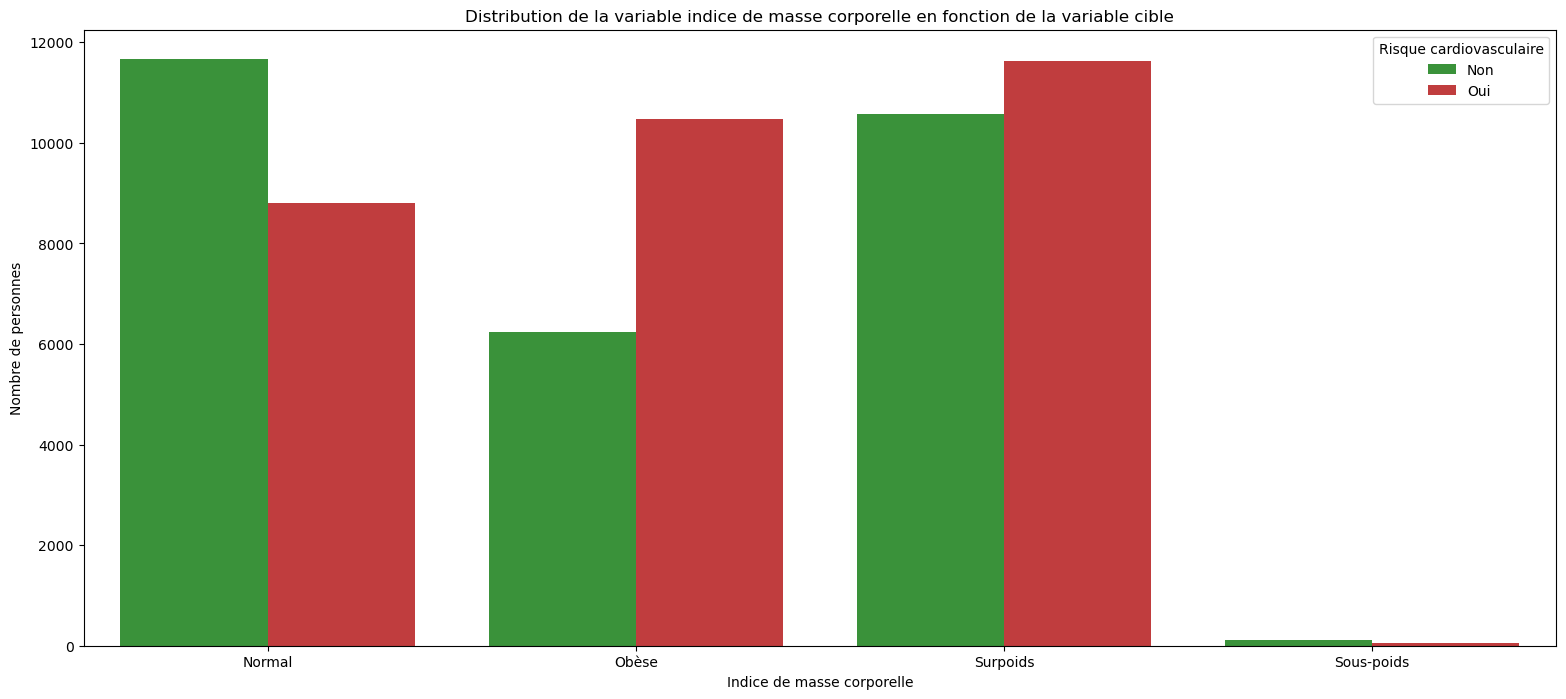

In [30]:
# visualisation de la distribution de la variable indice de masse corporelle en fonction de la variable cible
plt.figure(figsize=(19, 8))
sns.countplot(x='bmi', hue='cardio', data=df, palette=carisk)
plt.title('Distribution de la variable indice de masse corporelle en fonction de la variable cible')
plt.legend(loc='upper right', labels=['Non', 'Oui'], title='Risque cardiovasculaire')
plt.xlabel('Indice de masse corporelle')
plt.ylabel('Nombre de personnes')
plt.show()

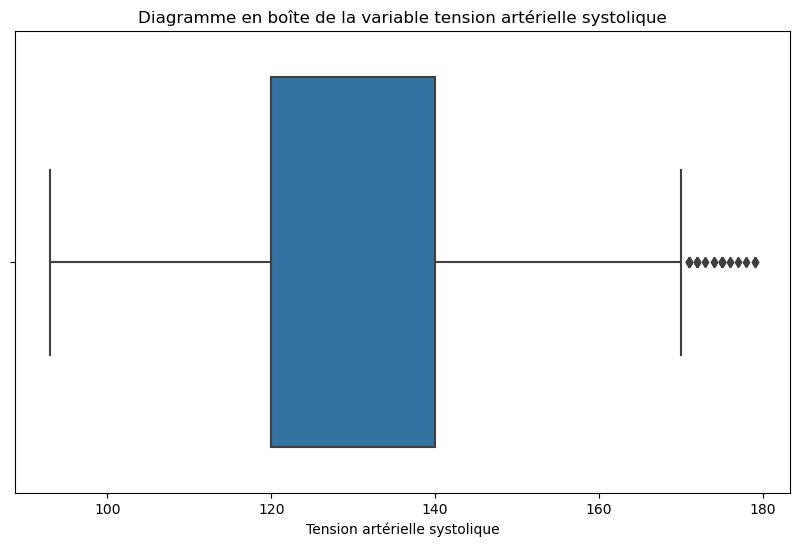

In [31]:
# diagramme en boite de la variable tension artérielle systolique
plt.figure(figsize=(10, 6))
sns.boxplot(x='ap_hi', data=df)
plt.title('Diagramme en boîte de la variable tension artérielle systolique')
plt.xlabel('Tension artérielle systolique')
plt.show()

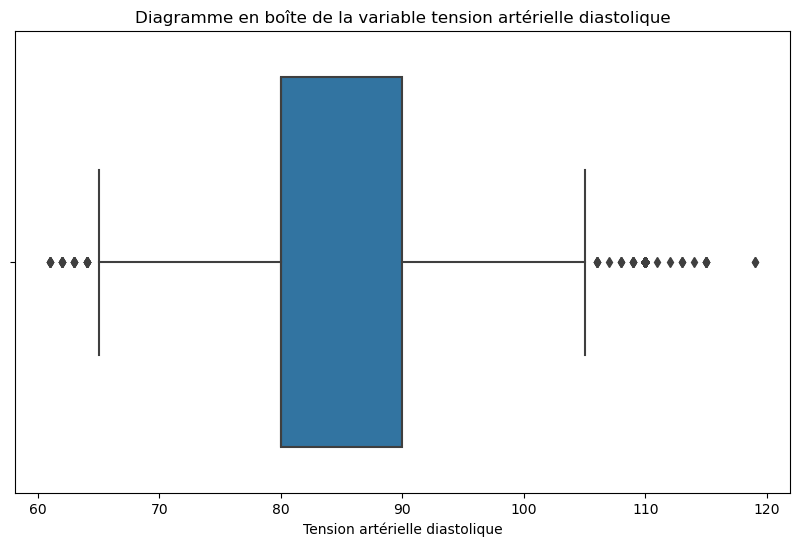

In [32]:
# diagramme en boite de la variable tension artérielle diastolique
plt.figure(figsize=(10, 6))
sns.boxplot(x='ap_lo', data=df)
plt.title('Diagramme en boîte de la variable tension artérielle diastolique')
plt.xlabel('Tension artérielle diastolique')
plt.show()

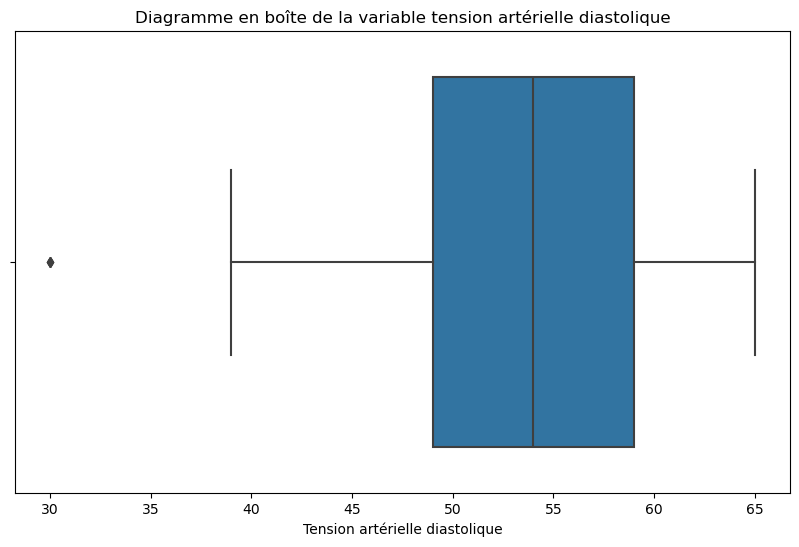

In [33]:
# diagramme en boite de la variable tension artérielle diastolique
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', data=df)
plt.title('Diagramme en boîte de la variable tension artérielle diastolique')
plt.xlabel('Tension artérielle diastolique')
plt.show()

On observe que le poids a une influence sur les risques de maladies.   
Ici, les personnes obèses représentent la catégorie de population la plus sujette aux risques de maladies cardio-vasculaire.

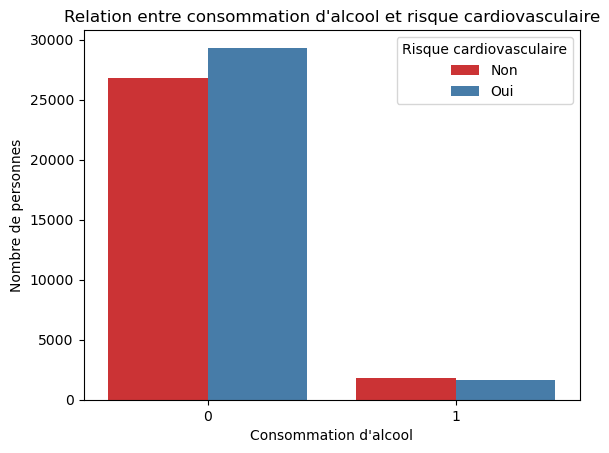

In [34]:
# visualisation de la relation entre consommation d'alcool et risque cardiovasculaire
sns.countplot(x='alco', hue='cardio', data=df, palette='Set1')
plt.title('Relation entre consommation d\'alcool et risque cardiovasculaire')
plt.legend(loc='upper right', labels=['Non', 'Oui'], title='Risque cardiovasculaire')
plt.xlabel('Consommation d\'alcool')
plt.ylabel('Nombre de personnes')
plt.show()

Bien que les non-consommateurs d'alcool soient sur-représentés dans notre jeu de données, il n'y a pas de lien réel entre consommation d'alcool et risque de maladie cardio-vasculaire.   
Les risques sont proportionnellement les mêmes chez les consommateurs et non-consommateurs.

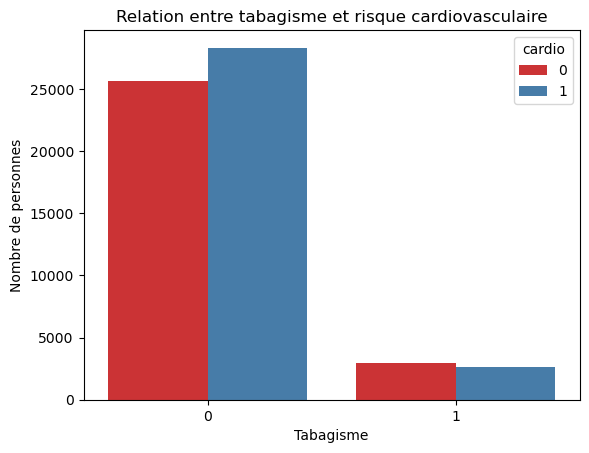

In [35]:
# visualisation de la relation entre tabagisme et risque cardiovasculaire
sns.countplot(x='smoke', hue='cardio', data=df, palette='Set1')
plt.title('Relation entre tabagisme et risque cardiovasculaire')
# plt.legend(loc='upper right', labels=['Oui', 'Non'], title='Risque cardiovasculaire')
plt.xlabel('Tabagisme')
plt.ylabel('Nombre de personnes')
plt.show()

Même constat que pour la consommation d'alcool, le tabagisme ne semble pas être un facteur déterminant (du moins à lui seul) quant aux risques de contracter une maladie cardio-vasculaire.   
Les risques sont proportionnellement les mêmes chez les consommateurs et non-consommateurs.

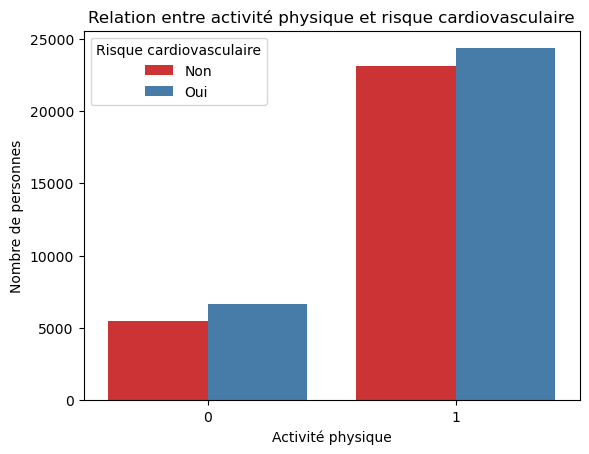

In [36]:
# visualisation de la relation entre activité physique et risque cardiovasculaire
sns.countplot(x='active', hue='cardio', data=df, palette='Set1')
plt.title('Relation entre activité physique et risque cardiovasculaire')
plt.legend(loc='upper left', labels=['Non', 'Oui'], title='Risque cardiovasculaire')
plt.xlabel('Activité physique')
plt.ylabel('Nombre de personnes')
plt.show()

On observe ici que les patients qui pratiquent une activité physique sont moins susceptibles de contracter une maladie cardia-vasculaire que ceux qui n'en pratiquent pas.

#### **Bref résumé des observations faites:**   
En visualisant les différentes corrélations qui existent et en les observant à l'aide de graphiques, on constate alors que des variables telles que le tabagisme et la consommation d'alcool ne sont pas réellement déterminantes quant au risque de développer une maladie cardio-vasculaire chez un patient.   
Les personnes qui pratiquent une activité physique sont moins susceptibles de développer une maladie cardio-vasculaire que celles qui n'en pratiquent pas.   
On remarque de manière significative que plus le patient est âgé, plus ce dernier est susceptible de développer une maladie cardio-vasculaire.   
Également, les personnes en obésité sont plus concernées par ces risques que le reste de la population.   

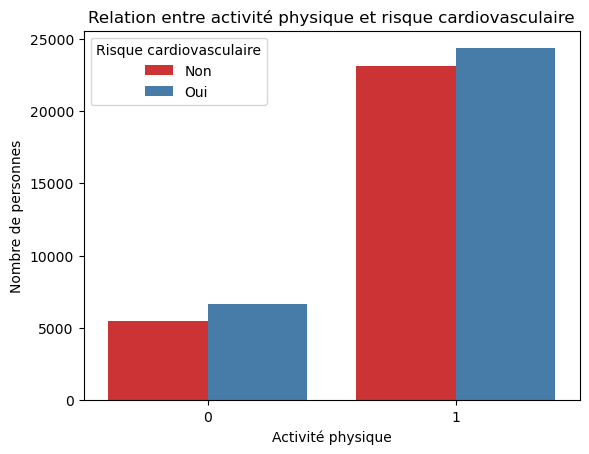

In [37]:
# pal = ['tab:blue', 'tab:red']
# visualisation de la relation entre activité physique et risque cardiovasculaire
sns.countplot(x='active', hue='cardio', data=df, palette='Set1')
plt.title('Relation entre activité physique et risque cardiovasculaire')
plt.legend(loc='upper left', labels=['Non', 'Oui'], title='Risque cardiovasculaire')
plt.xlabel('Activité physique')
plt.ylabel('Nombre de personnes')
plt.show()

## Réalisation d'une régression logistique
    Sklearn
    - Test
    - Modification des hyper-paramètres

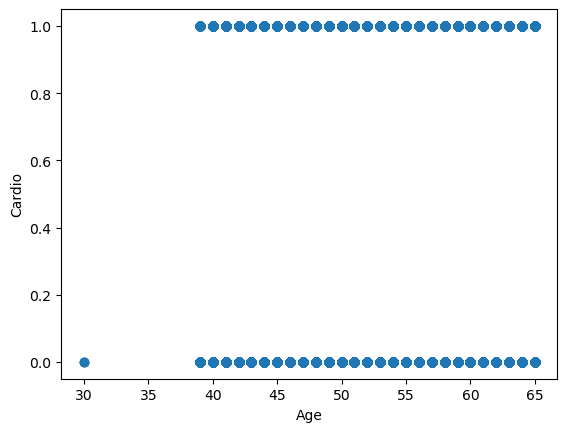

In [38]:
plt.scatter(df['age'], df['cardio'])
plt.xlabel('Age')
plt.ylabel('Cardio')
plt.show()

In [39]:
# # Visualisation de la courbe sigmoid
import numpy as np

# x = np.linspace(-10, 10, 100)
# y = 1 / (1 + np.exp(-x))

# plt.plot(x, y)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Courbe sigmoid')
# plt.show()

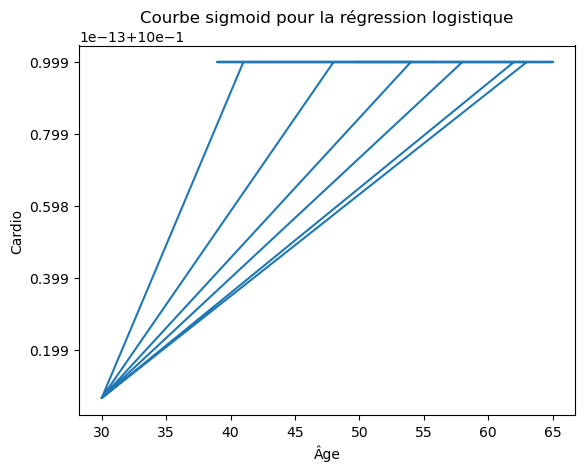

In [40]:
# Définition de la fonction sigmoid
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))
# Définition de la fonction sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Génération de valeurs pour x
# x = np.linspace(-10, 10, 100)
x = df['age']

# Calcul des valeurs de y
y = sigmoid(x)

# Visualisation de la courbe sigmoid
plt.plot(x, y)
plt.xlabel('Âge')
plt.ylabel('Cardio')
plt.title('Courbe sigmoid pour la régression logistique')
plt.show()


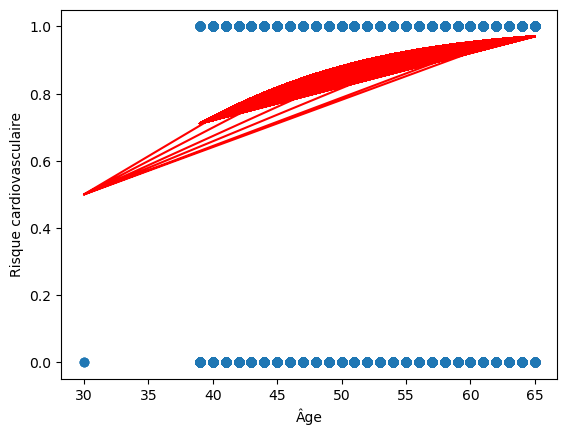

In [41]:
# Définition de la fonction sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = df['age']
y = df['cardio']

# Calcul de la pente et de l'ordonnée à l'origine
slope = 0.1
intercept = -3

# Calcul de la valeur de y
y_pred = sigmoid(slope * x + intercept)

# Visualisation de la courbe sigmoid
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Âge')
plt.ylabel('Risque cardiovasculaire')
plt.show()

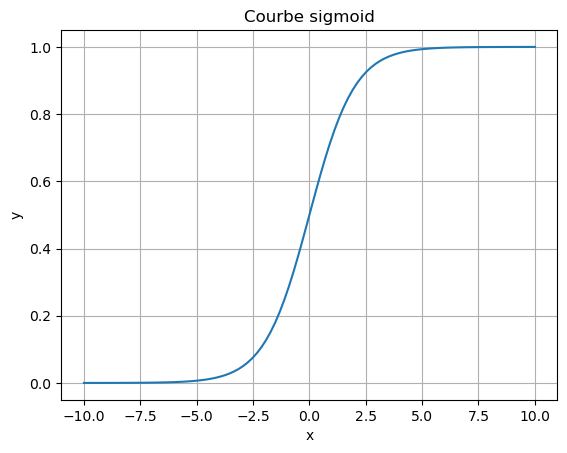

In [42]:
x = df['age']
y = df['cardio']

# Calcul de la fonction sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Création d'un tableau de valeurs x
x_values = np.linspace(-10, 10, 100)

# Calcul des valeurs y
y_values = sigmoid(x_values)

# Visualisation de la courbe sigmoid
plt.plot(x_values, y_values)
plt.title('Courbe sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [43]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,mean_bp
0,50,2,168,62.0,110,80,1,1,0,0,1,0,Normal,High
1,55,1,156,85.0,140,90,3,1,0,0,1,1,Obèse,High
2,52,1,165,64.0,130,70,3,1,0,0,0,1,Normal,High
3,48,2,169,82.0,150,100,1,1,0,0,1,1,Surpoids,High
4,60,1,151,67.0,120,80,2,2,0,0,0,0,Surpoids,High


In [44]:
# # mapping de la variable cible
# df['cardio'] = df['cardio'].map({'No': 0, 'Yes': 1})

# df.head()

In [45]:
# X = df.iloc[:, :-3].values

In [46]:
# y = df.iloc[:, -3].values

In [47]:
# Séparation du dataset en variables dépendantes et indépendantes
# X = df.drop(columns=['cardio','bmi', 'mean_bp']).values
X = df.iloc[:, :-9]
y = df['cardio'].values
X

,age,gender,height,weight,ap_hi
0,50,2,168,62.0,110
1,55,1,156,85.0,140
2,52,1,165,64.0,130
3,48,2,169,82.0,150
4,60,1,151,67.0,120
...,...,...,...,...,...
59555,58,1,165,80.0,150
59556,53,2,168,76.0,120
59557,62,1,158,126.0,140
59558,61,1,163,72.0,135


In [48]:
# Séparation du dataset en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
# Initialisation du modèle de régression logistique
classifier = LogisticRegression(solver='liblinear', random_state=0)

In [50]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000,59560.000000
mean,53.461165,1.365883,164.754953,75.289293,127.420047,82.149144,1.389036,1.240715,0.093721,0.057304,0.796592,0.519862
std,6.770578,0.481681,7.814395,13.943013,14.723068,8.101546,0.696522,0.587939,0.291442,0.232424,0.402537,0.499610
min,30.000000,1.000000,141.000000,51.000000,93.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,73.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,198.000000,183.000000,179.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# Entraînement du modèle
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [52]:
# Prédiction sur les données de test
y_pred = classifier.predict(X_test)

In [53]:
# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle: {accuracy:.2f}')

Précision du modèle: 0.71


In [54]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matrice de confusion')
print(conf_matrix)

Matrice de confusion
[[4214 1449]
 [2041 4208]]


In [55]:
# Rapport de classification
class_report = classification_report(y_test, y_pred)
print('Rapport de classification')
print(class_report)

Rapport de classification
              precision    recall  f1-score   support

           0       0.67      0.74      0.71      5663
           1       0.74      0.67      0.71      6249

    accuracy                           0.71     11912
   macro avg       0.71      0.71      0.71     11912
weighted avg       0.71      0.71      0.71     11912



In [56]:
age = 50
gender = 2
height = 175
weight = 85.0
ap_hi = 50
ap_lo = 50
cholesterol = 1
gluc = 1
smoke = 0
alco = 0
active = 1

In [57]:
# # prediction = classifier.predict([[50, 2, 175, 85.0, 50, 50, 1, 1, 1, 0, 1]])
# prediction = classifier.predict([[age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]])
# pred_answer = ''
# if prediction[0] == 0:
#     pred_answer = 'Non'
# else:
#     pred_answer = 'Oui'
# print(f'Le patient est-il sujet à une maladie cardio-vasculaire: {pred_answer}.')

AUC: 0.77


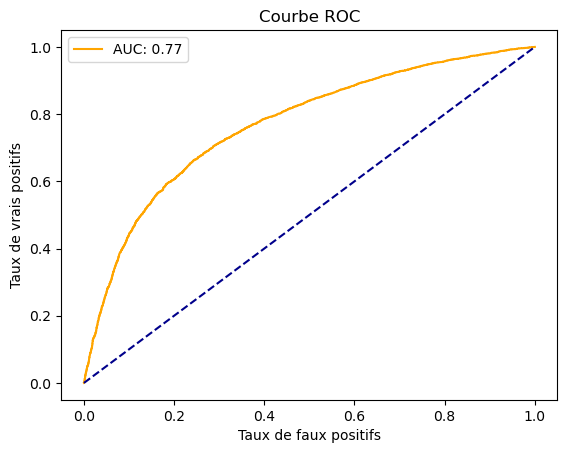

In [58]:
# Calcul des probabilités prédites
y_probs = classifier.predict_proba(X_test)

# Calcul de l'AUC
auc = roc_auc_score(y_test, y_probs[:, 1])
print(f'AUC: {auc:.2f}')

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])

# Visualisation de la courbe ROC
plt.plot(fpr, tpr, color='orange', label=f'AUC: {auc:.2f}')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()